In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [2]:
tabpfn_class = pd.read_csv("/vol/miltank/projects/practical_sose25/in_context_learning/classification/results/tabpfn_classification/classification_all_folds.csv")
y_true = tabpfn_class["Actual"]
y_pred = tabpfn_class["Predicted"]


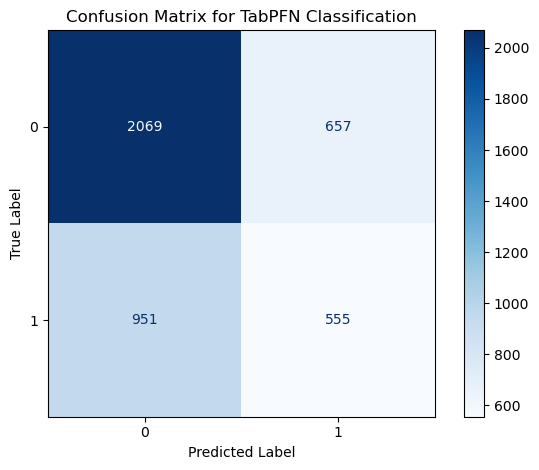

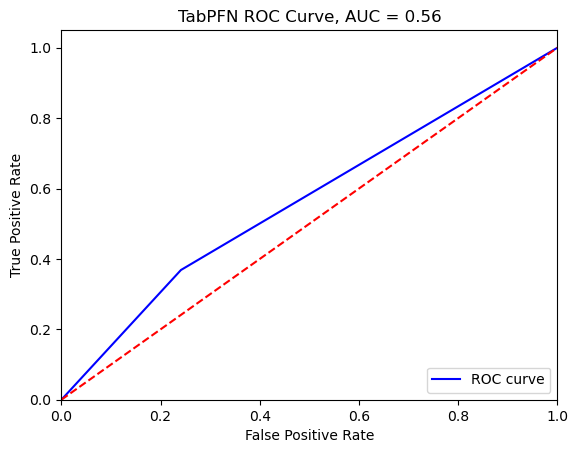

In [4]:
# confusion matrix, 

cm = confusion_matrix(y_true, y_pred, labels=tabpfn_class["Actual"].unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tabpfn_class["Actual"].unique())
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix for TabPFN Classification") 
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()
# plot ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'TabPFN ROC Curve, AUC = {roc_auc:.2f}')
plt.legend(loc='lower right')
plt.show()


In [5]:
fold_folder = "/vol/miltank/projects/practical_sose25/in_context_learning/classification/results/tabpfn_classification/test_set/"
folds = [f"fold_{i}_results.csv" for i in range(5)]

fold_aucs = []
fold_f1_scores = []
fold_accs = []
fold_weighted_accs = []
y_true_all = []
y_pred_all = []

for fold in folds:
    fold_data = pd.read_csv(f"{fold_folder}{fold}")
    y_true_fold = fold_data["Actual"]
    y_pred_fold = fold_data["Predicted"]
    
    # Calculate AUC
    fpr_fold, tpr_fold, _ = roc_curve(y_true_fold, y_pred_fold, pos_label=1)
    roc_auc_fold = auc(fpr_fold, tpr_fold)
    fold_aucs.append(roc_auc_fold)
    
    # Calculate F1 Score
    f1_score = 2 * (np.mean(y_true_fold == y_pred_fold) * np.mean(y_pred_fold == 1)) / (np.mean(y_true_fold == y_pred_fold) + np.mean(y_pred_fold == 1))
    fold_f1_scores.append(f1_score)
    
    # Calculate Accuracy
    accuracy = np.mean(y_true_fold == y_pred_fold)
    fold_accs.append(accuracy)

    # Calculate Weighted Accuracy
    weighted_accuracy = accuracy_score(y_true_fold, y_pred_fold, normalize=True, sample_weight=None)
    fold_weighted_accs.append(weighted_accuracy)

    y_true_all.extend(y_true_fold)
    y_pred_all.extend(y_pred_fold)
    # Calculate variance
    variance = np.var(y_pred_fold)


print("Fold AUCs:", fold_aucs)
print("Fold F1 Scores:", fold_f1_scores)
print("Fold Accuracies:", fold_accs,"\n")
print(f"Samples true: {sum(y_true_all)}/{len(y_true_all)}\n")

# Calculate overall metrics
auc_total = np.mean(fold_aucs)
f1_total = np.mean(fold_f1_scores)
accuracy_total = np.mean(fold_accs)
weighted_accuracy_total = np.mean(fold_weighted_accs)


print("Overall AUC:", auc_total, "Variance:", np.var(fold_aucs))
print("Overall F1 Score:", f1_total, "Variance:", np.var(fold_f1_scores))
print("Overall Accuracy:", accuracy_total, "Variance:", np.var(fold_accs))
print("Overall Weighted Accuracy:", weighted_accuracy_total, "Variance:", np.var(fold_weighted_accs))

Fold AUCs: [0.578561941343289, 0.5464381474710542, 0.5449018025289212, 0.5734777105892279, 0.5782272287648632]
Fold F1 Scores: [0.38002348944670333, 0.38608258818327634, 0.38156601090079517, 0.3965667795455029, 0.4141416837965064]
Fold Accuracies: [0.6328217237308147, 0.6056670602125147, 0.5981087470449172, 0.6288416075650118, 0.6347517730496454] 

Samples true: 1506/4232

Overall AUC: 0.564321366139471 Variance: 0.0002353869203882141
Overall F1 Score: 0.39167611037455685 Variance: 0.0001595811620957203
Overall Accuracy: 0.6200381823205807 Variance: 0.00022896765226366572
Overall Weighted Accuracy: 0.6200381823205807 Variance: 0.00022896765226366572


Fold AUCs GPT-2: [0.6817885390865253, 0.708860450944546, 0.6893462469733656, 0.685227418634938, 0.7085964612846335]
Fold F1 Scores GPT-2: [0.44554041000322, 0.4686008477364662, 0.5004562008817328, 0.47438928289992127, 0.46297810059867184]
Fold Accuracies GPT-2: [0.7154663518299882, 0.7367178276269185, 0.7056737588652482, 0.7115839243498818, 0.7399527186761229] 

Samples true GPT-2: 1506/4232

Overall AUC GPT-2: 0.6947638233848017, Variance: 0.0001
Overall F1 Score GPT-2: 0.4703929684240024, Variance: 0.0003
Overall Accuracy GPT-2: 0.721878916269632, Variance: 0.0002
Overall Weighted Accuracy GPT-2: 0.721878916269632, Variance: 0.0002


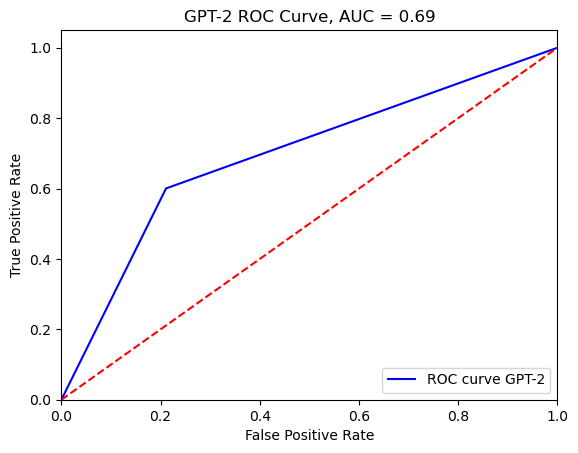

In [6]:
fold_folder_gpt2_class = "/vol/miltank/projects/practical_sose25/in_context_learning/classification/results/gpt2_icl/test_set/"
folds_gpt2 = [f"fold_{i}_results.csv" for i in range(5)]

fold_aucs_gpt2 = []
fold_f1_scores_gpt2 = []
fold_accs_gpt2 = []
fold_weighted_accs_gpt2 = []
y_true_all_gpt2 = []
y_pred_all_gpt2 = []

for fold in folds_gpt2:
    fold_data = pd.read_csv(f"{fold_folder_gpt2_class}{fold}")
    y_true_fold = fold_data["Actual"]
    y_pred_fold = fold_data["Predicted"]
    
    # Calculate AUC
    fpr_fold, tpr_fold, _ = roc_curve(y_true_fold, y_pred_fold, pos_label=1)
    roc_auc_fold = auc(fpr_fold, tpr_fold)
    fold_aucs_gpt2.append(roc_auc_fold)
    
    # Calculate F1 Score
    f1_score = 2 * (np.mean(y_true_fold == y_pred_fold) * np.mean(y_pred_fold == 1)) / (np.mean(y_true_fold == y_pred_fold) + np.mean(y_pred_fold == 1))
    fold_f1_scores_gpt2.append(f1_score)
    
    # Calculate Accuracy
    accuracy = np.mean(y_true_fold == y_pred_fold)
    fold_accs_gpt2.append(accuracy)

    # Calculate Weighted Accuracy
    weighted_accuracy = accuracy_score(y_true_fold, y_pred_fold, normalize=True, sample_weight=None)
    fold_weighted_accs_gpt2.append(weighted_accuracy)

    y_true_all_gpt2.extend(y_true_fold)
    y_pred_all_gpt2.extend(y_pred_fold)
    # Calculate variance
    variance = np.var(y_pred_fold)

print("Fold AUCs GPT-2:", fold_aucs_gpt2)
print("Fold F1 Scores GPT-2:", fold_f1_scores_gpt2)
print("Fold Accuracies GPT-2:", fold_accs_gpt2,"\n")
print(f"Samples true GPT-2: {sum(y_true_all_gpt2)}/{len(y_true_all_gpt2)}\n")

# Calculate overall metrics for GPT-2
auc_total_gpt2 = np.mean(fold_aucs_gpt2)
f1_total_gpt2 = np.mean(fold_f1_scores_gpt2)
accuracy_total_gpt2 = np.mean(fold_accs_gpt2)
weighted_accuracy_total_gpt2 = np.mean(fold_weighted_accs_gpt2)
print(f"Overall AUC GPT-2: {auc_total_gpt2}, Variance: {np.var(fold_aucs_gpt2):.4f}")
print(f"Overall F1 Score GPT-2: {f1_total_gpt2}, Variance: {np.var(fold_f1_scores_gpt2):.4f}")
print(f"Overall Accuracy GPT-2: {accuracy_total_gpt2}, Variance: {np.var(fold_accs_gpt2):.4f}")
print(f"Overall Weighted Accuracy GPT-2: {weighted_accuracy_total_gpt2}, Variance: {np.var(fold_weighted_accs_gpt2):.4f}")

# plot overall ROC curve for GPT-2
fpr_gpt2, tpr_gpt2, _ = roc_curve(y_true_all_gpt2, y_pred_all_gpt2, pos_label=1)
roc_auc_gpt2 = auc(fpr_gpt2, tpr_gpt2)
plt.figure()
plt.plot(fpr_gpt2, tpr_gpt2, color='blue', label='ROC curve GPT-2')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'GPT-2 ROC Curve, AUC = {roc_auc_gpt2:.2f}')
plt.legend(loc='lower right')
plt.show()

In [2]:
regression_results = pd.read_csv("/vol/miltank/projects/practical_sose25/in_context_learning/regression/results/icl_results/emb_set/tabpfn_fold_emb_predictions.csv")

reg_folds = regression_results["Fold"].unique()
reg_maes = []
reg_mae_std_devs = []
reg_mses = []
reg_mses_std_devs = []
reg_r2s = []
reg_r2_std_devs = []

for fold in reg_folds:
    fold_data = regression_results[regression_results["Fold"] == fold]
    actuals = fold_data["Actual"]
    predictions = fold_data["Predicted whole"]
    fold_maes = fold_data["MAE whole"]

    fold_data = fold_data.copy()
    fold_data.loc[:, "MSE"] = (actuals - predictions) ** 2
    fold_data.loc[:, "R2"] = 1 - (fold_data["MSE"] / actuals.var())

    reg_maes.append(mean_absolute_error(actuals, predictions))
    reg_mses.append(mean_squared_error(actuals, predictions))
    reg_r2s.append(r2_score(actuals, predictions))

    fold_wise_mae_std_dev = np.std(fold_maes)
    reg_mae_std_devs.append(fold_wise_mae_std_dev)
    reg_mses_std_devs.append(np.std(fold_data["MSE"]))
    reg_r2_std_devs.append(np.std(fold_data["R2"]))

print("Regression total MAE:", np.mean(reg_maes))
print("Regression total MSE:", np.mean(reg_mses))
print("Regression total R2:", np.mean(reg_r2s))
print("Regression MAE Variance:", np.var(reg_maes))
print("Regression MSE Variance:", np.var(reg_mses))
print("Regression R2 Variance:", np.var(reg_r2s))





Regression total MAE: 3.6522012604823137
Regression total MSE: 20.935979276527554
Regression total R2: 0.6680904597294669
Regression MAE Variance: 0.018554117278877652
Regression MSE Variance: 1.711018030432864
Regression R2 Variance: 0.0008112285173108308


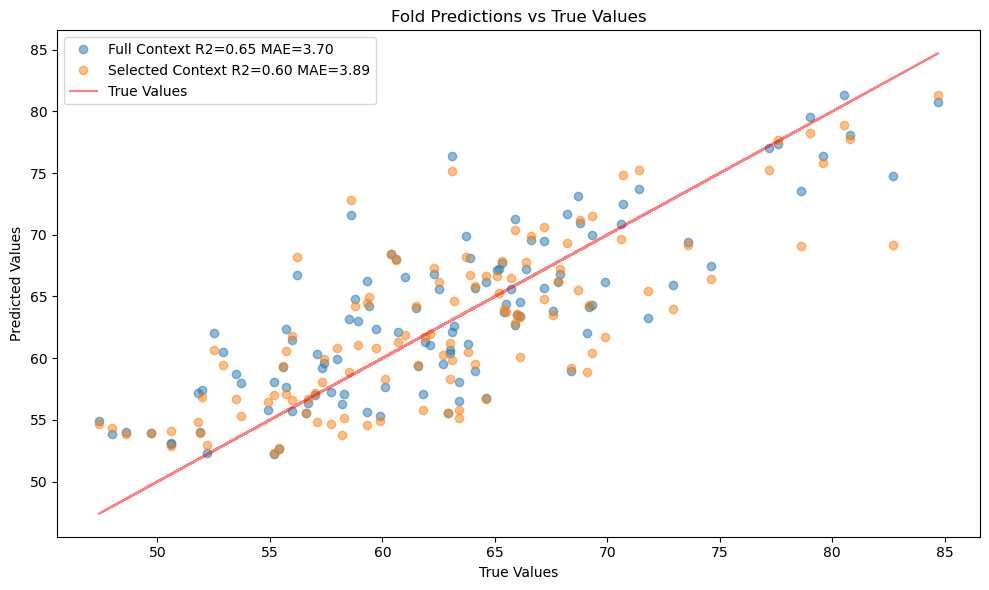

In [7]:
fold_0_predictions_path = "/vol/miltank/projects/practical_sose25/in_context_learning/regression/outfiles2/foldpreds/fold_1.csv"
fold_0_predictions = pd.read_csv(fold_0_predictions_path)
fold_0_normal_preds = fold_0_predictions["normal_preds"]
fold_0_adv_preds = fold_0_predictions["adv_preds"]
fold_0_true = fold_0_predictions["true_values"]

plt.figure(figsize=(10, 6))
plt.plot(fold_0_true, fold_0_normal_preds, 'o', label=f'Full Context R2={r2_score(fold_0_true, fold_0_normal_preds):.2f} MAE={mean_absolute_error(fold_0_true, fold_0_normal_preds):.2f}', alpha=0.5)
plt.plot(fold_0_true, fold_0_adv_preds, 'o', label=f'Selected Context R2={r2_score(fold_0_true, fold_0_adv_preds):.2f} MAE={mean_absolute_error(fold_0_true, fold_0_adv_preds):.2f}', alpha=0.5)
plt.plot(fold_0_true, fold_0_true, 'r-', label='True Values', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Fold Predictions vs True Values')
plt.legend()
plt.tight_layout()
plt.show()

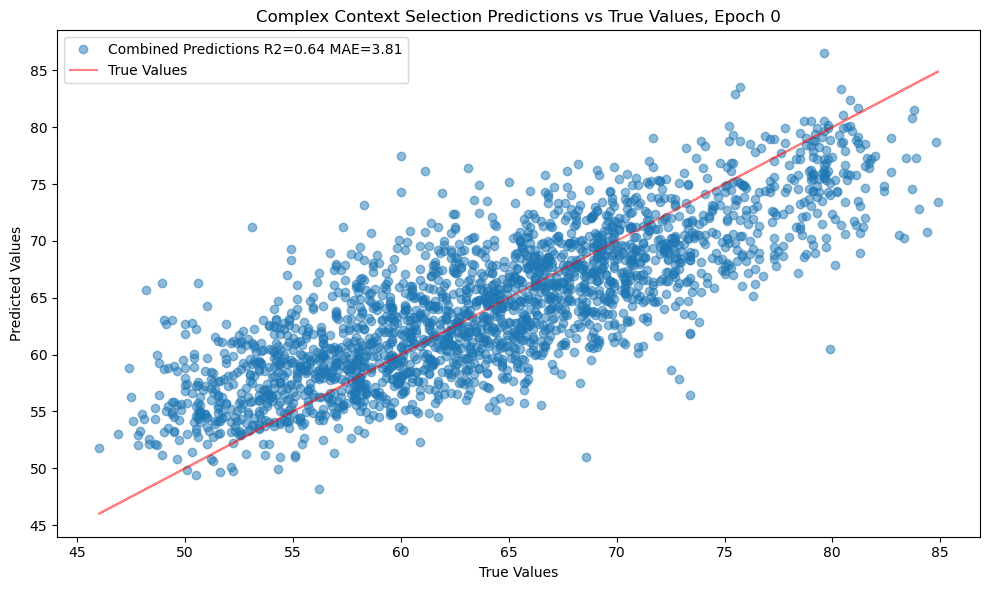

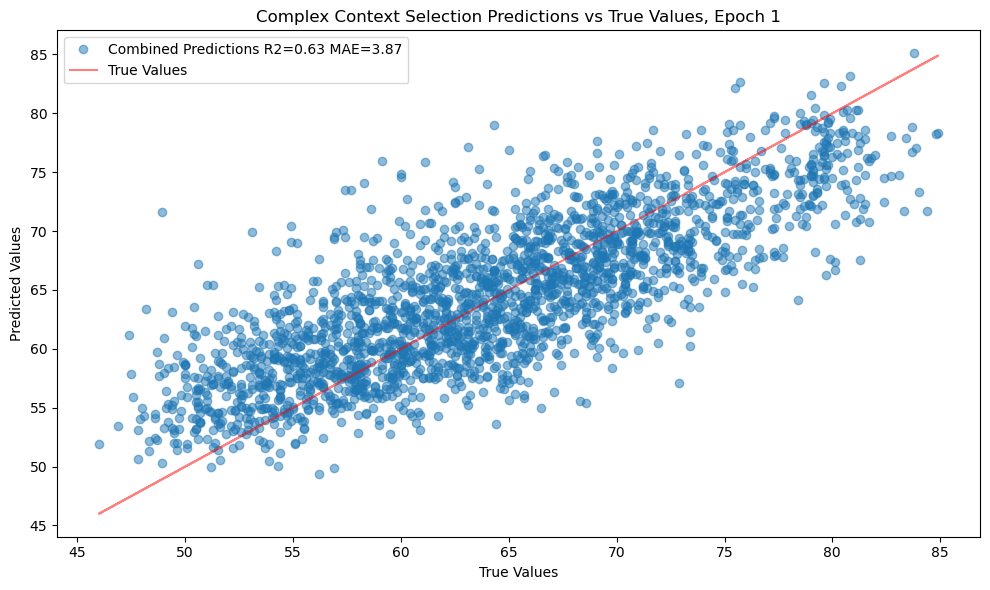

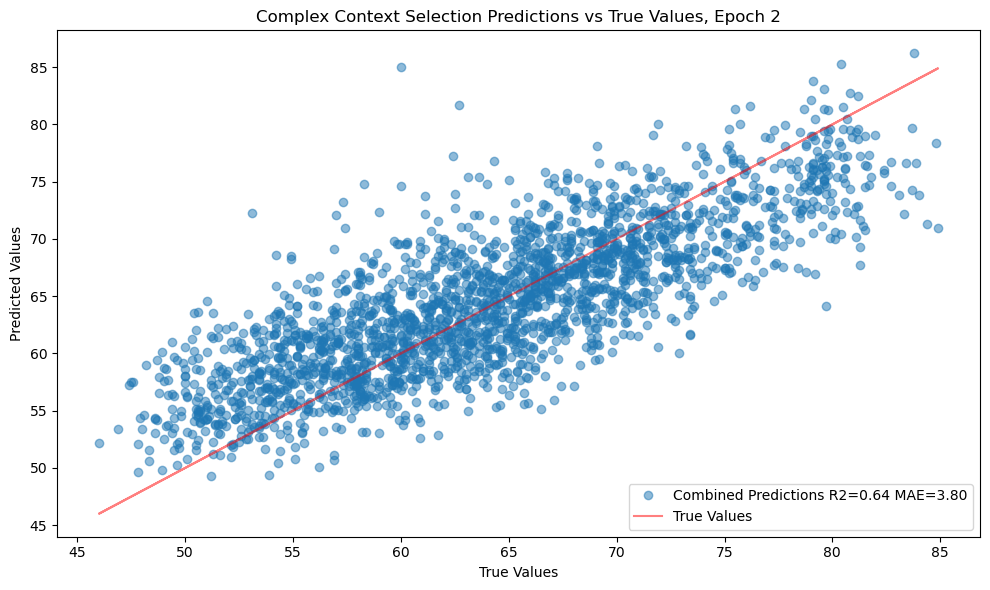

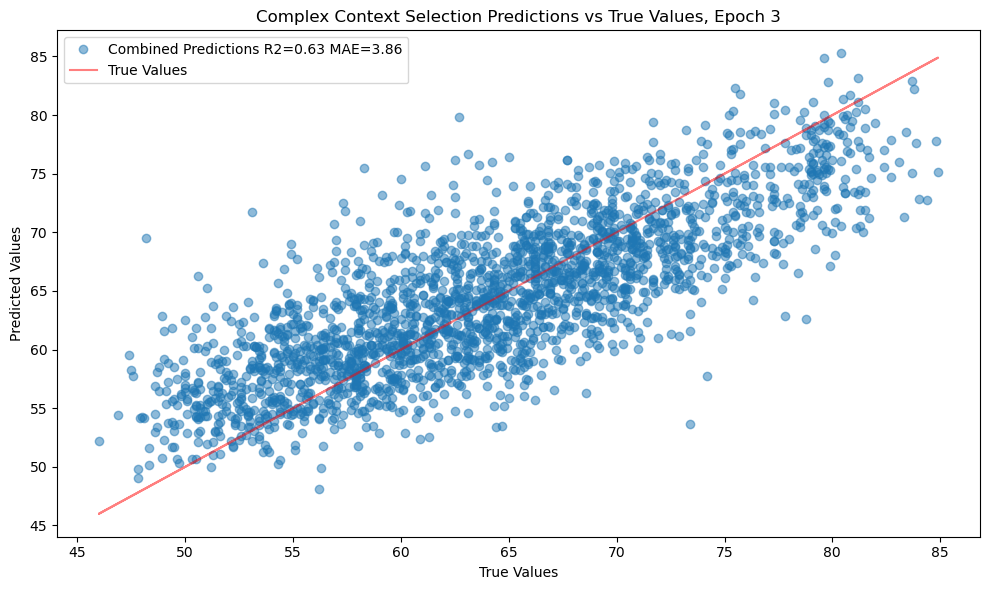

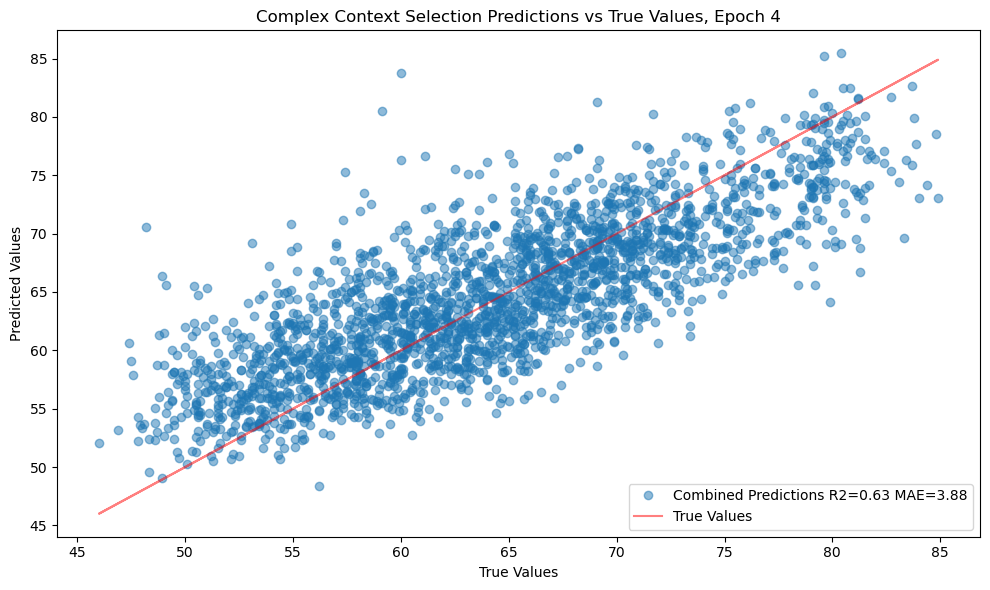

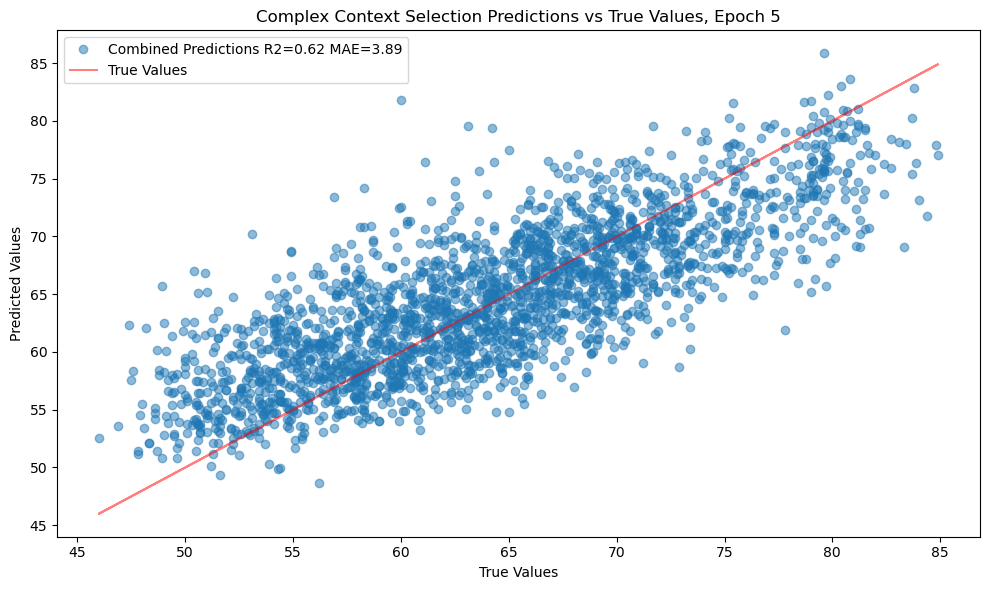

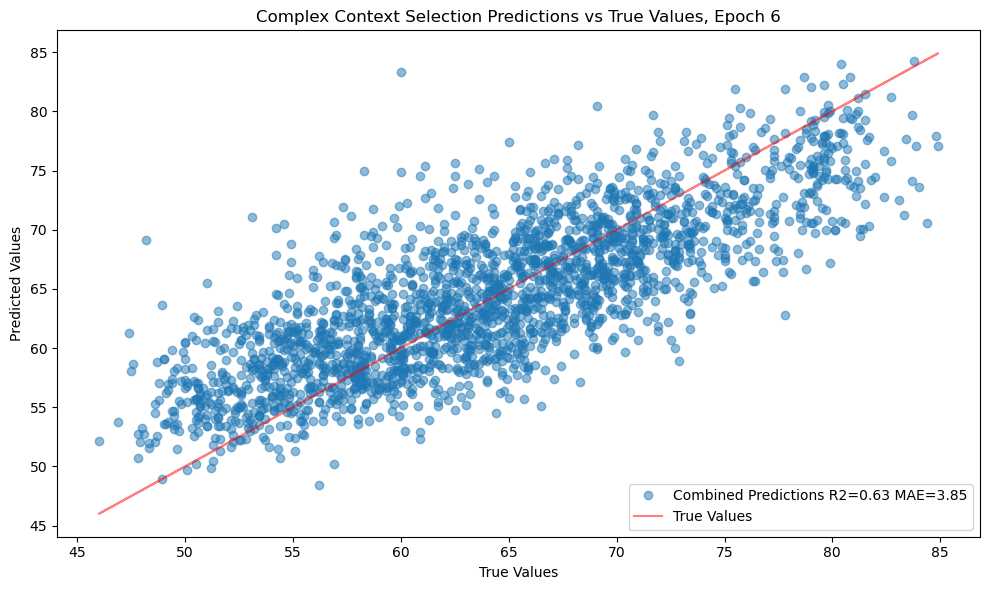

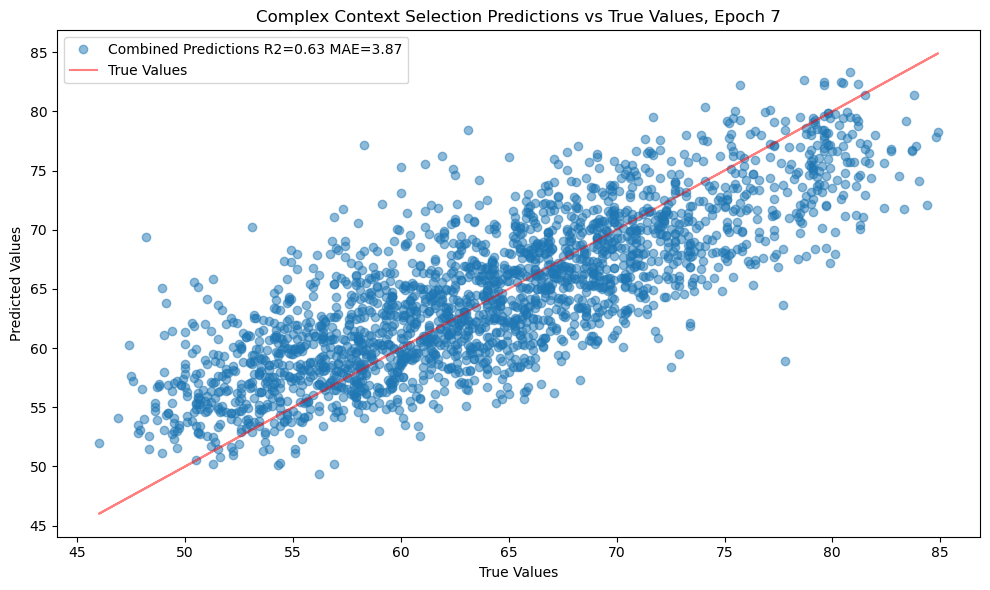

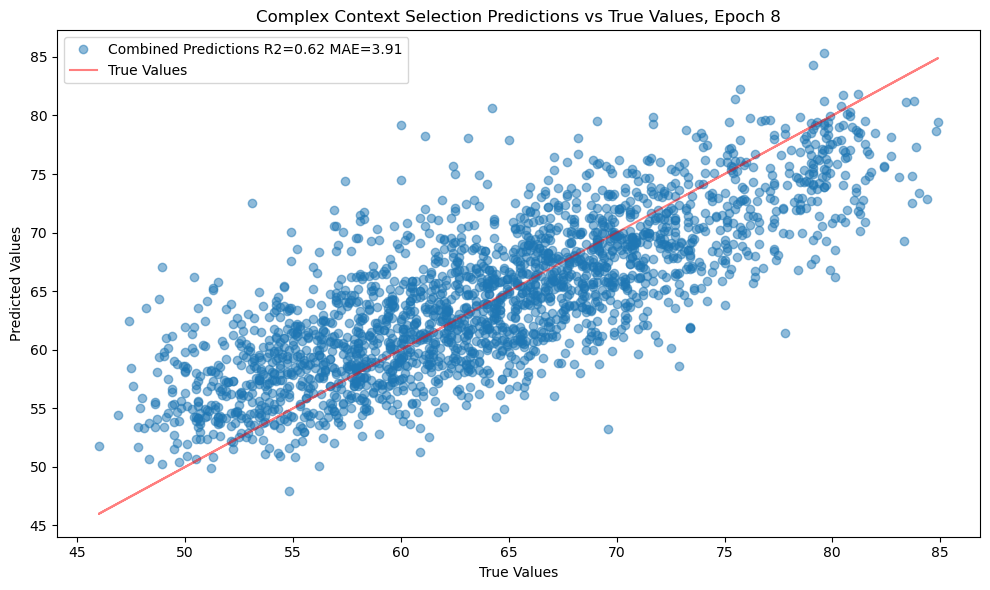

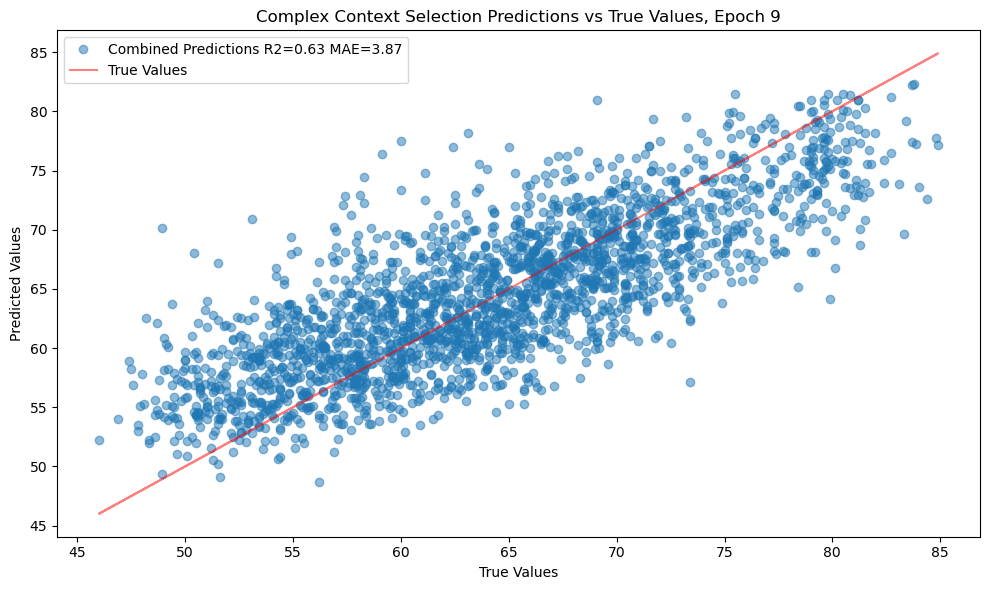

In [6]:
foldpreds_path = "/vol/miltank/projects/practical_sose25/in_context_learning/regression/outfiles2/foldpreds/"

for epoch in range(10):
    fold_preds = []
    for val_fold in range(1,5):
        fold_preds.append(pd.read_csv(f"{foldpreds_path}regression_fold_0_val_{val_fold}_epoch_{epoch}.csv"))

    combined_preds = pd.concat(fold_preds, ignore_index=True)
    combined_true = combined_preds["true"]
    combined_preds = combined_preds["preds"]
    # plot combined predictions
    plt.figure(figsize=(10, 6))
    plt.plot(combined_true, combined_preds, 'o', label=f'Combined Predictions R2={r2_score(combined_true, combined_preds):.2f} MAE={mean_absolute_error(combined_true, combined_preds):.2f}', alpha=0.5)
    plt.plot(combined_true, combined_true, 'r-', label='True Values', alpha=0.5)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Complex Context Selection Predictions vs True Values, Epoch {epoch}')
    plt.legend()
    plt.tight_layout()
    plt.show()

<Figure size 1000x600 with 0 Axes>

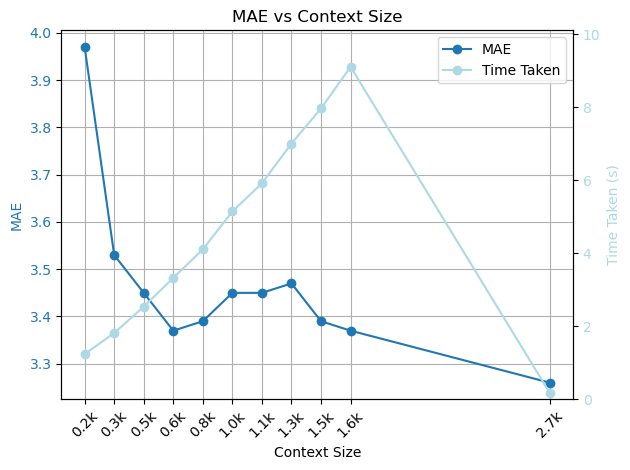

In [2]:
cont_sizes = [162, 324, 486, 648, 810, 972, 1134, 1296, 1458, 1620, 2712]
maes_cont = [3.97, 3.53, 3.45, 3.37, 3.39, 3.45, 3.45, 3.47, 3.39, 3.37, 3.26]
times_taken = [1.24, 1.82, 2.54, 3.33, 4.11, 5.15, 5.92, 7.01, 7.97, 9.11, 0.18]

outlier_dot = [2712, 3.12, 1.02]  # Last point as an outlier dot

# plot maes on left y axis and times on right y axis and last point as a outlier dot
colors = ['tab:blue', 'lightblue']
plt.figure(figsize=(10, 6))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Context Size')
ax1.set_ylabel('MAE', color=colors[0])
ax1.plot(cont_sizes, maes_cont, 'o-', color=colors[0], label='MAE')
ax1.tick_params(axis='y', labelcolor=colors[0])
ax1.set_xticks(cont_sizes)
ax1.set_xticklabels([f"{size/1000:.1f}k" for size in cont_sizes], rotation=45)
ax1.set_title('MAE vs Context Size')
ax1.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Time Taken (s)', color=colors[1])  # we already handled the x-label with ax1
ax2.plot(cont_sizes, times_taken, 'o-', color=colors[1], label='Time Taken')
ax2.tick_params(axis='y', labelcolor=colors[1])
ax2.set_ylim(0, max(times_taken) + 1)  # set y limits to avoid overlap with MAE
# ax1.scatter(outlier_dot[0], outlier_dot[1], color='red', s=50, label='MAE PCA 500', zorder=5)  # add outlier dot
fig.tight_layout()  # to ensure the right y-label is not slightly clipped
# legend for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines + lines2, labels + labels2, loc='upper right')
plt.show()

<Figure size 1000x2000 with 0 Axes>

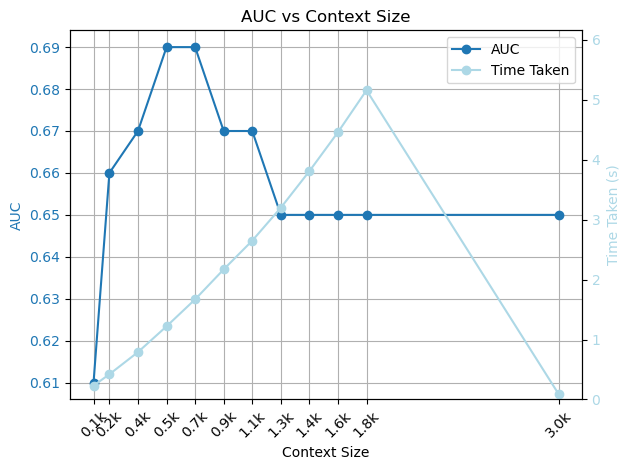

In [6]:
# classififcation

point_selector_fr = 2

context_size = [20, 50, 80, 180, 360, 540, 720, 900, 1080, 1260, 1440, 1620, 1800,3010][point_selector_fr:]
time_taken = [0.31, 0.20, 0.23, 0.42, 0.79, 1.22, 1.67, 2.17, 2.65, 3.20, 3.81, 4.46, 5.16, 0.09][point_selector_fr:]
aucs = [0.62, 0.62, 0.61, 0.66, 0.67, 0.69, 0.69, 0.67, 0.67, 0.65, 0.65, 0.65, 0.65, 0.65][point_selector_fr:]

# plot aucs on left y axis and times on right y axis
colors = ['tab:blue', 'lightblue']
plt.figure(figsize=(10, 20))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Context Size')
ax1.set_ylabel('AUC', color=colors[0])
ax1.plot(context_size, aucs, 'o-', color=colors[0], label='AUC')
ax1.tick_params(axis='y', labelcolor=colors[0])
ax1.set_xticks(context_size)
ax1.set_xticklabels([f"{size/1000:.1f}k" for size in context_size], rotation=45)
ax1.set_title('AUC vs Context Size')
ax1.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Time Taken (s)', color=colors[1])  # we already handled the x-label with ax1
ax2.plot(context_size, time_taken, 'o-', color=colors[1], label='Time Taken')
ax2.tick_params(axis='y', labelcolor=colors[1])
ax2.set_ylim(0, max(time_taken) + 1)  # set y limits to avoid overlap with AUC
fig.tight_layout()  # to ensure the right y-label is not slightly clipped
# legend for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines + lines2, labels + labels2, loc='upper right')
plt.show()

In [14]:
healthy_train_data = pd.read_csv("/vol/miltank/projects/practical_sose25/in_context_learning/data/raw/healthy_train.csv")
healthy_test_data = pd.read_csv("/vol/miltank/projects/practical_sose25/in_context_learning/data/raw/healthy_test.csv")

combined_count = len(healthy_train_data) + len(healthy_test_data)
print(combined_count)

all_ages = healthy_train_data["age"].tolist() + healthy_test_data["age"].tolist()

age_mean = np.mean(all_ages)
age_std = np.std(all_ages)
age_median = np.median(all_ages)
age_min = np.min(all_ages)
age_max = np.max(all_ages)

print(f"Age Mean: {age_mean}, Std: {age_std}, Median: {age_median}, Min: {age_min}, Max: {age_max}")

3553
Age Mean: 64.0343653250774, Std: 7.943020308916882, Median: 63.8, Min: 46.0, Max: 84.9


In [10]:
test_reg_data = pd.read_csv("/vol/miltank/projects/practical_sose25/in_context_learning/data/regression/emb_rfat_test.csv")

test_reg_data["spleen_shape_Elongation"].iloc[1]

1.610387585118216

In [12]:
test_reg_data["stomach_shape_SurfaceArea"].iloc[1]

-1.391189141778338

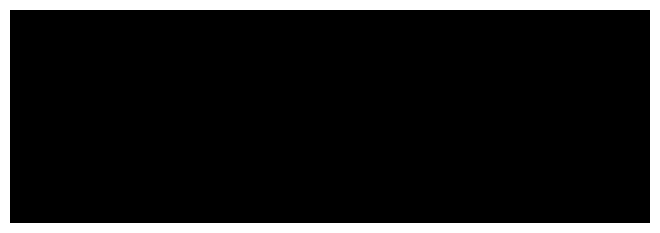

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

image_path = "/vol/miltank/projects/ukbb/data/whole_body/nifti_2d/1001948.png"
image = Image.open(image_path)
plt.imshow(np.array([[2,2,2]]), cmap='gray') # changed to prevent ukbb data leakage
# plt.imshow(image, cmap='gray')             # use this line to display the actual image
plt.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.show()

In [7]:
stats_classification = {
    "LogisticRegression": {
        "Accuracy": [0.770, 0.769, 0.740, 0.767, 0.759],
        "F1": [0.761, 0.764, 0.729, 0.760, 0.750],
        "Precision": [0.765, 0.764, 0.733, 0.762, 0.753],
        "Recall": [0.770, 0.769, 0.740, 0.767, 0.759],
        "Time": [13.14, 12.70, 12.78, 13.75, 13.47]
    },
    "RandomForest": {
        "Accuracy": [0.734, 0.778, 0.736, 0.747, 0.738],
        "F1": [0.713, 0.762, 0.714, 0.729, 0.711],
        "Precision": [0.731, 0.783, 0.735, 0.745, 0.742],
        "Recall": [0.734, 0.778, 0.736, 0.747, 0.738],
        "Time": [272.49, 259.47, 273.76, 261.94, 256.31]
    },
    "DecisionTree": {
        "Accuracy": [0.640, 0.665, 0.617, 0.660, 0.598],
        "F1": [0.638, 0.665, 0.614, 0.660, 0.595],
        "Precision": [0.637, 0.665, 0.611, 0.661, 0.593],
        "Recall": [0.640, 0.665, 0.617, 0.660, 0.598],
        "Time": [2.32, 2.19, 2.46, 2.30, 2.19]
    },
    "HistGradientBoosting": {
        "Accuracy": [0.739, 0.766, 0.734, 0.760, 0.751],
        "F1": [0.724, 0.757, 0.720, 0.749, 0.735],
        "Precision": [0.733, 0.762, 0.727, 0.756, 0.747],
        "Recall": [0.739, 0.766, 0.734, 0.760, 0.751],
        "Time": [34.10, 34.15, 34.32, 35.27, 35.87]
    },
    "MLP": {
        "Accuracy": [0.743, 0.737, 0.697, 0.728, 0.741],
        "F1": [0.734, 0.735, 0.691, 0.720, 0.719],
        "Precision": [0.736, 0.733, 0.689, 0.720, 0.741],
        "Recall": [0.743, 0.737, 0.697, 0.728, 0.741],
        "Time": [15.97, 14.46, 14.92, 16.31, 16.29]
    },
    "KNeighbors": {
        "Accuracy": [0.688, 0.697, 0.693, 0.674, 0.652],
        "F1": [0.646, 0.677, 0.649, 0.633, 0.617],
        "Precision": [0.678, 0.683, 0.687, 0.655, 0.625],
        "Recall": [0.688, 0.697, 0.693, 0.674, 0.652],
        "Time": [2.79, 2.81, 2.84, 2.88, 2.84]
    },
    "NaiveBayes": {
        "Accuracy": [0.680, 0.695, 0.677, 0.701, 0.680],
        "F1": [0.683, 0.700, 0.681, 0.703, 0.681],
        "Precision": [0.688, 0.713, 0.687, 0.707, 0.683],
        "Recall": [0.680, 0.695, 0.677, 0.701, 0.680],
        "Time": [0.04, 0.05, 0.05, 0.04, 0.05]
    },
    "XGBoost": {
        "Accuracy": [0.757, 0.757, 0.746, 0.770, 0.746],
        "F1": [0.741, 0.745, 0.728, 0.759, 0.728],
        "Precision": [0.755, 0.752, 0.743, 0.766, 0.743],
        "Recall": [0.757, 0.757, 0.746, 0.770, 0.746],
        "Time": [129.74, 129.70, 131.20, 132.80, 138.79]
    },
    "LightGBM": {
        "Accuracy": [0.750, 0.779, 0.735, 0.762, 0.739],
        "F1": [0.734, 0.768, 0.720, 0.750, 0.724],
        "Precision": [0.746, 0.778, 0.728, 0.759, 0.733],
        "Recall": [0.750, 0.779, 0.735, 0.762, 0.739],
        "Time": [19.42, 20.18, 20.27, 19.33, 20.86]
    },
    "TabPFNICL": {
        "Accuracy": [0.512, 0.497, 0.508, 0.517, 0.466],
        "F1": [0.523, 0.508, 0.518, 0.527, 0.477],
        "Precision": [0.554, 0.538, 0.541, 0.564, 0.508],
        "Recall": [0.512, 0.497, 0.508, 0.517, 0.466],
        "Time": [13.44, 12.96, 13.14, 12.87, 13.38]
    },
    "GPT2ICL": {
        "Accuracy": [0.648, 0.658, 0.643, 0.642, 0.629],
        "F1": [0.611, 0.630, 0.609, 0.600, 0.598],
        "Precision": [0.618, 0.634, 0.613, 0.608, 0.597],
        "Recall": [0.648, 0.658, 0.643, 0.642, 0.629],
        "Time": [14.48, 15.04, 13.78, 14.61, 14.24]
    }
}

stat_means = {model: {metric: np.mean(values) for metric, values in stats.items()} for model, stats in stats_classification.items()}
stat_vars = {model: {metric: np.var(values) for metric, values in stats.items()} for model, stats in stats_classification.items()}

print("Means of classification stats:")
for model, stats in stat_means.items():
    print(f"{model}:")
    for metric, value in stats.items():
        print(f"\t{metric}: {value:.3f}")
print("\nVariances of classification stats:")
for model, stats in stat_vars.items():
    print(f"{model}:")
    for metric, value in stats.items():
        print(f"\t{metric}: {value:.3f}")

Means of classification stats:
LogisticRegression:
	Accuracy: 0.761
	F1: 0.753
	Precision: 0.755
	Recall: 0.761
	Time: 13.168
RandomForest:
	Accuracy: 0.747
	F1: 0.726
	Precision: 0.747
	Recall: 0.747
	Time: 264.794
DecisionTree:
	Accuracy: 0.636
	F1: 0.634
	Precision: 0.633
	Recall: 0.636
	Time: 2.292
HistGradientBoosting:
	Accuracy: 0.750
	F1: 0.737
	Precision: 0.745
	Recall: 0.750
	Time: 34.742
MLP:
	Accuracy: 0.729
	F1: 0.720
	Precision: 0.724
	Recall: 0.729
	Time: 15.590
KNeighbors:
	Accuracy: 0.681
	F1: 0.644
	Precision: 0.666
	Recall: 0.681
	Time: 2.832
NaiveBayes:
	Accuracy: 0.687
	F1: 0.690
	Precision: 0.696
	Recall: 0.687
	Time: 0.046
XGBoost:
	Accuracy: 0.755
	F1: 0.740
	Precision: 0.752
	Recall: 0.755
	Time: 132.446
LightGBM:
	Accuracy: 0.753
	F1: 0.739
	Precision: 0.749
	Recall: 0.753
	Time: 20.012
TabPFNICL:
	Accuracy: 0.500
	F1: 0.511
	Precision: 0.541
	Recall: 0.500
	Time: 13.158
GPT2ICL:
	Accuracy: 0.644
	F1: 0.610
	Precision: 0.614
	Recall: 0.644
	Time: 14.430

Varian

In [9]:
stats_regression = {
    "LinearRegression": {
        "R2": [0.701, 0.704, 0.663, 0.713, 0.683],
        "MAE": [3.469, 3.566, 3.700, 3.322, 3.499],
        "MSE": [18.521, 19.698, 21.868, 17.788, 19.438],
        "Time": [0.09, 0.15, 0.05, 0.05, 0.05]
    },
    "Ridge": {
        "R2": [0.702, 0.704, 0.663, 0.713, 0.683],
        "MAE": [3.464, 3.564, 3.701, 3.323, 3.497],
        "MSE": [18.473, 19.685, 21.875, 17.788, 19.423],
        "Time": [7.82, 7.59, 7.30, 7.45, 7.80]
    },
    "Lasso": {
        "R2": [0.708, 0.702, 0.664, 0.715, 0.688],
        "MAE": [3.441, 3.562, 3.714, 3.323, 3.481],
        "MSE": [18.075, 19.872, 21.812, 17.638, 19.134],
        "Time": [10.66, 11.08, 9.91, 10.14, 10.11]
    },
    "ElasticNet": {
        "R2": [0.708, 0.703, 0.664, 0.716, 0.688],
        "MAE": [3.441, 3.556, 3.711, 3.321, 3.481],
        "MSE": [18.086, 19.814, 21.806, 17.630, 19.147],
        "Time": [12.38, 12.60, 12.16, 12.13, 11.92]
    },
    "RandomForest": {
        "R2": [0.559, 0.504, 0.515, 0.551, 0.534],
        "MAE": [4.251, 4.614, 4.571, 4.275, 4.388],
        "MSE": [27.313, 33.039, 31.534, 27.846, 28.579],
        "Time": [81.06, 80.88, 81.48, 81.63, 81.86]
    },
    "MLP": {
        "R2": [0.363, 0.334, 0.342, 0.415, 0.308],
        "MAE": [5.006, 5.252, 5.215, 4.789, 5.145],
        "MSE": [39.498, 44.333, 42.736, 36.241, 42.437],
        "Time": [34.57, 32.63, 32.10, 30.63, 41.08]
    },
    "HistGradientBoostingRegressor": {
        "R2": [0.630, 0.614, 0.589, 0.634, 0.609],
        "MAE": [3.840, 4.041, 4.120, 3.816, 3.963],
        "MSE": [22.935, 25.700, 26.700, 22.712, 23.952],
        "Time": [180.15, 162.60, 46.14, 44.93, 49.51]
    },
    "KNN": {
        "R2": [0.464, 0.404, 0.447, 0.488, 0.455],
        "MAE": [4.728, 5.027, 4.804, 4.654, 4.737],
        "MSE": [33.209, 39.721, 35.915, 31.750, 33.435],
        "Time": [8.18, 7.89, 8.75, 7.85, 8.05]
    },
    "DecisionTree": {
        "R2": [0.076, 0.097, 0.083, 0.021, -0.056],
        "MAE": [5.957, 6.158, 6.041, 6.133, 6.443],
        "MSE": [57.315, 60.126, 59.566, 60.701, 64.773],
        "Time": [0.97, 0.96, 0.97, 0.98, 0.97]
    },
    "XGBoost": {
        "R2": [0.616, 0.580, 0.558, 0.608, 0.596],
        "MAE": [3.925, 4.237, 4.324, 3.987, 4.043],
        "MSE": [23.806, 27.952, 28.734, 24.290, 24.752],
        "Time": [288.64, 291.32, 290.21, 285.61, 291.35]
    },
    "LightGBM": {
        "R2": [0.637, 0.624, 0.590, 0.640, 0.629],
        "MAE": [3.807, 3.992, 4.103, 3.765, 3.883],
        "MSE": [22.530, 25.064, 26.629, 22.329, 22.742],
        "Time": [24.99, 45.13, 58.08, 25.36, 27.52]
    },
    "TabPFNICL": {
        "R2": [0.449, 0.404, 0.419, 0.455, 0.437],
        "MAE": [4.695, 5.077, 4.922, 4.623, 4.720],
        "MSE": [34.173, 39.688, 37.731, 33.773, 34.494],
        "Time": [159.02, 151.23, 147.17, 144.29, 150.46]
    },
    "GPT2ICL": {
        "R2": [-0.206, -0.184, -0.154, -0.159, -0.208],
        "MAE": [6.892, 7.072, 6.839, 6.818, 7.037],
        "MSE": [74.764, 78.853, 74.935, 71.865, 74.072],
        "Time": [1174.67, 1166.49, 1147.17, 1091.53, 1159.11]
    }
}

stat_means_reg = {model: {metric: np.mean(values) for metric, values in stats.items()} for model, stats in stats_regression.items()}
stat_vars_reg = {model: {metric: np.var(values) for metric, values in stats.items()} for model, stats in stats_regression.items()}

# create a csv file with headers:
# model, R2, R2 Var, MAE, MAE Var, MSE, MSE Var, Time, Time Var
with open("regression_stats.csv", "w") as f:
    f.write("Model,R2,R2 Var,MAE,MAE Var,MSE,MSE Var,Time,Time Var\n")
    for model, stats in stat_means_reg.items():
        f.write(f"{model},{stats['R2']},{stat_vars_reg[model]['R2']},{stats['MAE']},{stat_vars_reg[model]['MAE']},{stats['MSE']},{stat_vars_reg[model]['MSE']},{stats['Time']},{stat_vars_reg[model]['Time']}\n")

        